<a href="https://colab.research.google.com/github/PauloHFS/descriptive-data-analysis-2023-1/blob/main/Lab4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Clustering

Utilizando o dataset indicado abaixo, faça 2 ou 3 agrupamentos usando KMeans. Cada agrupamento deve ser executado em conjuntos diferentes de colunas do dataframe.

## Dados do(a) aluno(a)

**Nome**: Paulo Hernane Fontes e Silva

**Matrícula**: 119210311

## Imports.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans


## Carregando o **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset:
# https://drive.google.com/file/d/1Ez7TUtxvBZeRdIUvCT6KPqI9qirmkLSA/view?usp=sharing

df = pd.read_csv('/content/drive/MyDrive/clientes.csv')
df.head()

,ID,Genero,Idade,Renda,Pontuacao Consumo
0,1,M,19,15,39
1,2,M,21,15,81
2,3,F,20,16,6
3,4,F,23,16,77
4,5,F,31,17,40


In [ ]:
# Function to calculate the
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    KM = KMeans(n_clusters = k)
    KM.fit(X)
    sse.append(KM.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

  return sse

## Primeiro Agrupamento (Cálculo + Plot)

### Definindo a entrada do algoritmo (X)

In [ ]:
X = df[['Renda', 'Pontuacao Consumo']]

X.head()

,Renda,Pontuacao Consumo
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Cálculo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

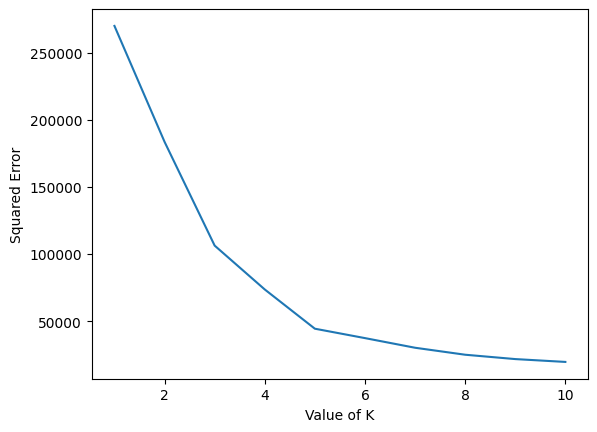

In [ ]:
# test with 1 to 10 clusters to get the sum of the points to the closest sample (we can see this as the variance)
plt.plot(range(1, 11), calculate_WSS(X, 10))
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()

Como podemos observar no gráfico o elbow se encontra em k = 5, então iremos usar 5 como numero de clurster.

In [ ]:
# código

algorithm = KMeans(n_clusters = 5)
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot

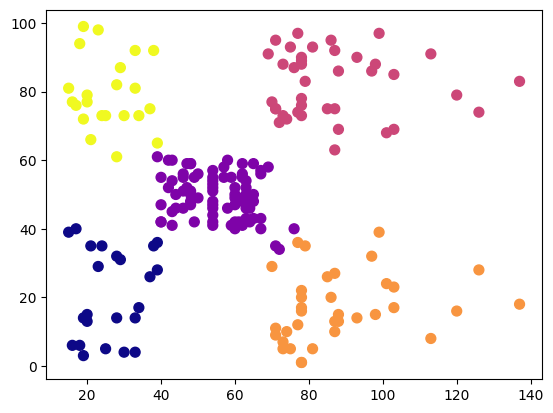

In [ ]:
y_kmeans = algorithm.predict(X)
plt.scatter(x=X["Renda"], y=X['Pontuacao Consumo'], c=y_kmeans, s=50, cmap='plasma')

## Segundo Agrupamento (Cálculo + Plot)

In [ ]:
X = df[['Renda', 'Idade']]

X.head()

,Renda,Idade
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

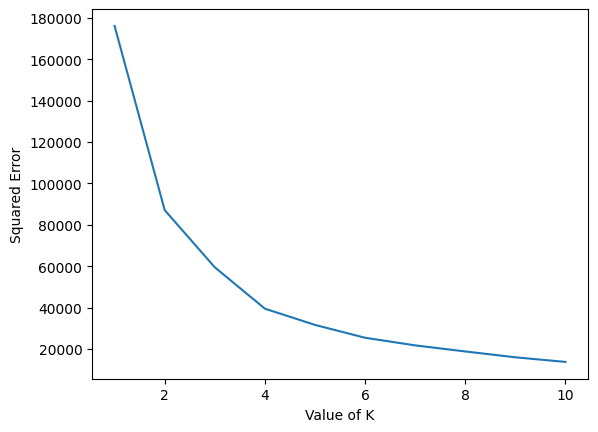

In [ ]:
plt.plot(range(1, 11), calculate_WSS(X, 10))
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()

Como podemos observar no gráfico o elbow se encontra em k = 4, então iremos usar 4 como numero de clurster.

In [ ]:
algorithm = KMeans(n_clusters = 4 )
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


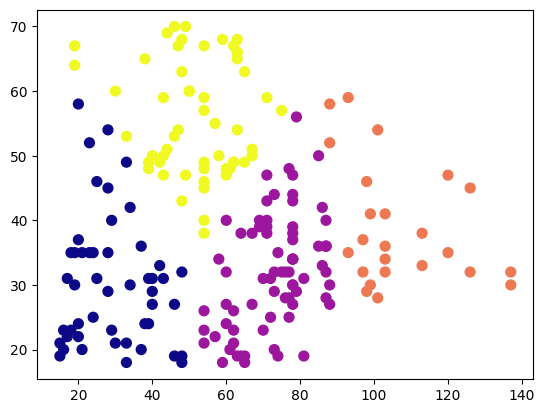

In [ ]:
y_kmeans = algorithm.predict(X)
plt.scatter(x=X["Renda"], y=X['Idade'], c=y_kmeans, s=50, cmap='plasma')

## [Opcional] Terceiro Agrupamento (Cálculo + Plot)

In [ ]:
X = df[['Renda', 'Genero']]

X['Genero'] = X['Genero'].map({"M": 0, "F": 1})

X.head()

<ipython-input-63-ce38fab85e27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genero'] = X['Genero'].map({"M": 0, "F": 1})


,Renda,Genero
0,15,0
1,15,0
2,16,1
3,16,1
4,17,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

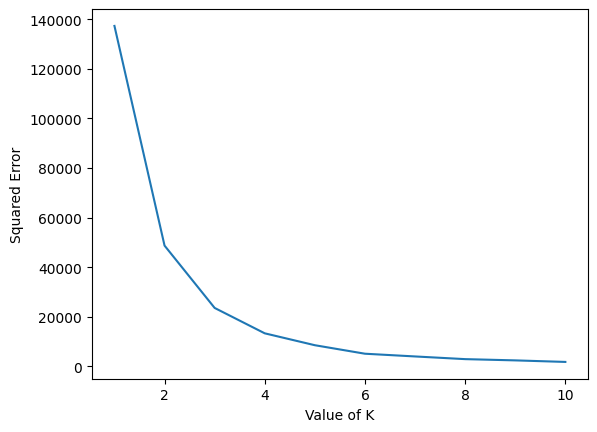

In [ ]:
plt.plot(range(1, 11), calculate_WSS(X, 10))
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()

Como podemos observar no gráfico o elbow se encontra em k = 4, então iremos usar 4 como numero de clurster.

In [ ]:
algorithm = KMeans(n_clusters = 4 )
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


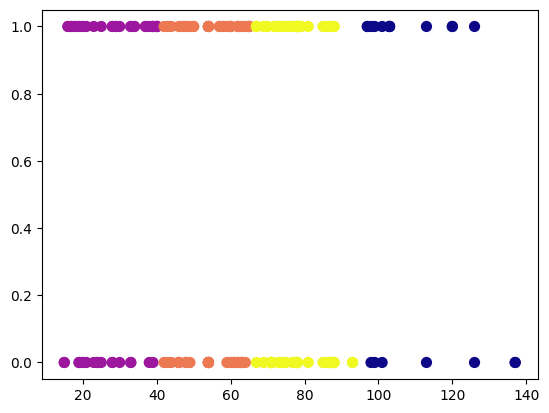

In [ ]:
y_kmeans = algorithm.predict(X)
plt.scatter(x=X["Renda"], y=X['Genero'], c=y_kmeans, s=50, cmap='plasma')